In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split


from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest , f_classif ,VarianceThreshold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC ,SVC

from sklearn import neighbors
from sklearn import metrics


from sklearn.model_selection import GridSearchCV ,validation_curve




from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier

from sklearn.pipeline import make_pipeline



from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve,recall_score
from sklearn.model_selection import learning_curve



In [2]:
#Lecture des données
df = pd.read_excel("/home/congo/Bureau/2022-m1-staps/motives_part/data_motives_final.xlsx","haller") 

In [3]:
#stoker le nom des colonnes
column_name = [c for c in df]


In [25]:
df_perso

(1075, 36)

In [5]:

df['Sexe'] = df['Sexe'].map({'Boy': 0 ,
                             'Girl': 1},
                             na_action=None)
                             

newdf = df.sort_values(by='Sexe')




In [6]:
# with pd.ExcelWriter('newdf.xlsx') as writer:
#      newdf.to_excel(writer, freeze_panes=(1,1))

In [7]:
print(newdf.loc[495,'Sexe'])
print(newdf.loc[496,'Sexe'])


0.0
1.0


In [8]:
# print(newdf.shape)

In [9]:
df_boy = newdf[:495]
# print(df_boy.loc[495,'Sexe'])
# print(df_boy.shape)

In [10]:
df_boy = newdf[:495]
df_girl = newdf[495:]
# print(df_girl.loc[:,'Sexe'])
# print(df_girl.shape)

In [11]:
# retour des nom des colonnes
newdf['Sexe'] = newdf['Sexe'].map({0 : 'Boy' ,
                             1 : 'Girl'
                             },
                             na_action=None)

# print(newdf.loc[:,'Sexe'])

##                            Preprosseccing with fonction

In [12]:
# fonction !!
def imputation(df):
    # mise a zero des valeurs manquantes
    return df.fillna(0)
    

def preprocessing(data):
    data = imputation(data)
    # garder les valeurs qui nous concerne
    data = data.to_numpy()
    data = data[:,39:]

    # rendre toute les valeurs positives
    data_correct = data
    data = np.absolute(data)

    #Supression des valeurs abérantes par rapport au seuil
    seuil = 5*np.std(data,axis=0,dtype = np.float64)
    
    data = np.array(data)
    data_tmp = np.zeros_like(data)
    data_tmp[data < seuil] = data[data < seuil]
    data = data_tmp
    
    return data , data_correct



def Normalisation():
    data_clean , data_correct = preprocessing(data)

    #indices à suprimer
    max = np.max(data_clean,axis = 1)
    indices = [i for i, e in enumerate(max) if e == 0]
    

    #suppression des lignes
    data_del = np.delete(data_clean,indices,axis = 0)
    data_clean = data_del

    #normalisation par ligne sans ecartype nul pour avoir des valeurs entre 0 et 1
    min = np.min(data_clean,axis = 1)
    max = np.max(data_clean,axis = 1)
    data_clean = (data_clean-min[:,np.newaxis])/max[:,np.newaxis]

    # retour des valeurs négatives

    #suppression des lignes
    data_del = np.delete(data_correct,indices,axis = 0)
    data_correct = data_del

    #indices des valeurs négatives
    indices_val_neg_i = np.where(data_correct < 0)
    
    data_clean[indices_val_neg_i] = -1*data_clean[indices_val_neg_i]

    return data_clean

In [13]:
# utilisation des fonctions !!
data = imputation(df)

data_clean , data_correct = preprocessing(data)

data_ready = Normalisation()


## Transfert of data in Rstudio for clustering

In [636]:
def transfert (df):
    # mettre data en df
    df = pd.DataFrame(data_ready)

    df_const = df.astype(float,errors='raise')
    # renommer les colonne
    df.columns = column_name[39:]
    df_const.columns = column_name[39:]
    #print(df.shape)

    # 'Confiance en soi' par 'Confiance_en_soi'
    # print(column_name[90])
    column_name[90] = 'Confiance_en_soi'
    # print(column_name[90])
    df = df.rename(columns={'Confiance en soi':'Confiance_en_soi'}) 

    # print(df['Confiance_en_soi'])
    # df_cluster.info()
    # probleme de type alors on le change
    df = df.astype(float,errors='raise')
    # df_cluster.info()    

    #renommer les lignes ( remplacer 0 par etudiant_0)
    nlin,ncol = data_ready.shape
    line_name = ['etudiant_' + str(i) for i in range(nlin)]
    # print(line_name)
    df.index = line_name
    df_const.index = line_name
    # print(df)

    # with pd.ExcelWriter('data_ready.xlsx') as writer:
    # df.to_excel(writer, freeze_panes=(1,1))

    df.to_csv('data_ready.csv')

In [651]:
#transfert fille
data = imputation(df_girl)

data_clean , data_correct = preprocessing(data)

data_ready = Normalisation()
transfert(df_girl)

In [650]:
#transfert garcon
data = imputation(df_boy)

data_clean , data_correct = preprocessing(data)

data_ready = Normalisation()
transfert(df_boy)

##   autres

In [15]:
# mettre data en df
df = pd.DataFrame(data_ready)

df_const = df.astype(float,errors='raise')
# renommer les colonne
df.columns = column_name[39:]
df_const.columns = column_name[39:]
#print(df.shape)



In [16]:
# 'Confiance en soi' par 'Confiance_en_soi'
# print(column_name[90])
column_name[90] = 'Confiance_en_soi'
# print(column_name[90])
df = df.rename(columns={'Confiance en soi':'Confiance_en_soi'}) 

# print(df['Confiance_en_soi'])

In [17]:
# df_cluster.info()
# probleme de type alors on le change
df = df.astype(float,errors='raise')
# df_cluster.info()

In [18]:
#renommer les lignes ( remplacer 0 par etudiant_0)
nlin,ncol = data_ready.shape
line_name = ['etudiant_' + str(i) for i in range(nlin)]
# print(line_name)
df.index = line_name
df_const.index = line_name
# print(df)

In [19]:
# with pd.ExcelWriter('data_ready.xlsx') as writer:
#     df.to_excel(writer, freeze_panes=(1,1))

In [20]:
df.to_csv('data_ready.csv')

In [72]:
# setwd("C:/Users/cschnitzler/Dropbox/staps/2021 2022/stage/master cmsi/job congo")
# library(readxl)

# data_motus <- read_excel("data_motus.xlsx")

# library(FactoMineR)
# library(Factoshiny)
# PCAshiny(data_motus)

# classification 

In [1]:
from pydoc import describe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest ,f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC ,SVC

from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier

from sklearn.pipeline import make_pipeline



from sklearn import neighbors
from sklearn import metrics

from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve,recall_score,precision_score
from sklearn.model_selection import learning_curve



In [2]:
#df = pd.read_csv("/home/congo/Bureau/2022-m1-staps/motives_part/clustering.csv") 


In [3]:
#df = pd.read_csv("/home/congo/Bureau/2022-m1-staps/motives_part/boy.csv") 
df = pd.read_csv("/home/congo/Bureau/2022-m1-staps/motives_part/girl.csv") 

In [4]:
df.drop(df.columns[[0]], axis = 1, inplace = True) 

In [5]:
df.head()

,Confort,Securite,Qualite,Force,Maintien,Puissance,Competition,Muscle,Beaute,Galbant,...,Sexy,Plaisir,Groupe,Partage,Role,Performance,Meilleur,Individualiste,detente,clust
0,0.140228,0.137599,0.120947,0.050248,0.200409,0.305288,0.353491,0.035933,0.150453,0.107800,...,0.131756,0.049664,0.784984,0.270231,0.153959,0.026293,0.237803,0.059305,0.192229,1
1,0.259847,0.063786,0.004703,0.020282,-0.101705,0.020282,0.185773,0.029394,0.034098,-0.176661,...,-0.278954,0.813639,0.098471,0.063198,-0.558789,0.573192,0.059377,-0.323045,0.215755,2
2,0.075472,0.043409,0.050007,0.035361,0.041166,0.045784,0.071250,0.069402,0.248714,0.951577,...,0.058451,0.035361,0.073493,0.023750,0.024541,0.034965,0.033118,0.035097,0.023882,1
3,0.082066,0.366603,0.101077,0.120089,0.360583,0.072560,0.085868,0.176489,0.000000,0.245247,...,0.525032,0.706274,0.397338,0.102662,0.116603,0.082383,0.047845,0.202155,0.065272,2
4,0.953540,0.047065,0.025557,0.000000,0.313533,0.010521,0.082212,0.002886,0.550952,0.207532,...,0.042316,0.015409,0.029747,0.016154,0.012011,0.046041,0.030120,0.056655,0.007029,1


In [6]:
y_3 = df.loc[:,'clust']

In [7]:
# y_3 = df.loc[:,'cluster3']
# y_4 = df.loc[:,'cluster4']
# y_5 = df.loc[:,'cluster5']

In [8]:
X = df
X.drop(df.columns[[71]], axis = 1, inplace = True) 
#X.head()

In [9]:
col_total  = X.columns
print(col_total)

Index(['Confort', 'Securite', 'Qualite', 'Force', 'Maintien', 'Puissance',
       'Competition', 'Muscle', 'Beaute', 'Galbant', 'Silhouette', 'Douceur',
       'Se_defouler', 'Energie', 'Legerete', 'Technicite', 'Se_relaxer',
       'Bien_etre', 'Liberte', 'Fluidite', 'Resistance', 'Inconfort',
       'Repetition', 'Intensite', 'Ralentissement', 'Acceleration',
       'Nouveaute', 'Endurance', 'Impact', 'Recuperation', 'Tolerance',
       'Decouragement', 'Perseverance', 'Objectif', 'Passivite', 'Brulure',
       'Fatigue', 'Transpiration', 'Rythme', 'Difficulte', 'Facilite', 'Lent',
       'Rapide', 'Ennuyeux', 'Regulier', 'Equilibre', 'Culpabilite',
       'Challenge', 'Progression', 'Accompagnement', 'Lassitude',
       'Confiance_en_soi', 'Actif', 'Stretchcing', 'Efficacite', 'Discipline',
       'Muscultation', 'Cardio', 'Vital', 'Depassement', 'Calme', 'Serenite',
       'Sexy', 'Plaisir', 'Groupe', 'Partage', 'Role', 'Performance',
       'Meilleur', 'Individualiste', 'detente']

In [10]:
train_ratio = 0.80
test_ratio = 0.20
validation_ratio = 0.10

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y_3, test_size=test_ratio)
#X_train_3, X_valid_3, y_train_3, y_valid_3 = train_test_split(X_train_3, y_train_3, test_size=validation_ratio/(train_ratio+test_ratio))


# X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y_4, test_size=test_ratio)
# X_train_4, X_valid_4, y_train_4, y_valid_4 = train_test_split(X_train_4, y_train_4, test_size=validation_ratio/(train_ratio+test_ratio))

# X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X, y_5, test_size=test_ratio)
# X_train_5, X_valid_5, y_train_5, y_valid_5 = train_test_split(X_train_5, y_train_5, test_size=validation_ratio/(train_ratio+test_ratio))

In [11]:
model = LogisticRegression(C= 1.0, penalty="l2")
parameters = {"C":1.0, "penalty":"l2"}

## 1) Modelisation et choix de l'algorithme de sélection

In [12]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias = False) ,SelectKBest(f_classif , k=10))

In [13]:
RandomForest_3 = make_pipeline(preprocessor,RandomForestClassifier(random_state=0))
SVM_3 = make_pipeline(preprocessor,SVC(random_state=0))
KNN_3 = make_pipeline(preprocessor,KNeighborsClassifier())
logreg_3 = make_pipeline(preprocessor,LogisticRegression())
svc_3 = make_pipeline(preprocessor,LinearSVC())


In [14]:
dict_of_models ={ 'KNN' :KNN_3,
                'logreg' :logreg_3,
                'SVC' : svc_3,
                #'RandomForest' :RandomForest_3,
                'SVM': SVM_3}

Procédure d'évalution des modèles

In [15]:
def evaluation(model):
    model.fit(X_train_3,y_train_3)
    y_pred_3 = model.predict(X_test_3)
    print(confusion_matrix(y_test_3 , y_pred_3))
    print(classification_report(y_test_3 , y_pred_3))

    N, train_score ,val_score = learning_curve(model, X_train_3,y_train_3,
                            train_sizes = np.linspace(0.1,1.0,10),cv=5)

    plt.figure(figsize =(12,8))
    plt.plot(N,train_score.mean(axis = 1), label ='train score')
    plt.plot(N,val_score.mean(axis = 1), label ='validation score')
    plt.xlabel('amount of data')
    plt.ylabel('Performance of model')
    plt.legend()

KNN
[[51  6  0]
 [14 19  2]
 [ 0  4 17]]
              precision    recall  f1-score   support

           1       0.78      0.89      0.84        57
           2       0.66      0.54      0.59        35
           3       0.89      0.81      0.85        21

    accuracy                           0.77       113
   macro avg       0.78      0.75      0.76       113
weighted avg       0.76      0.77      0.76       113

logreg
[[55  2  0]
 [21 12  2]
 [ 2  4 15]]
              precision    recall  f1-score   support

           1       0.71      0.96      0.81        57
           2       0.67      0.34      0.45        35
           3       0.88      0.71      0.79        21

    accuracy                           0.73       113
   macro avg       0.75      0.67      0.69       113
weighted avg       0.73      0.73      0.70       113

SVC
[[55  1  1]
 [22 10  3]
 [ 2  5 14]]
              precision    recall  f1-score   support

           1       0.70      0.96      0.81        57
   

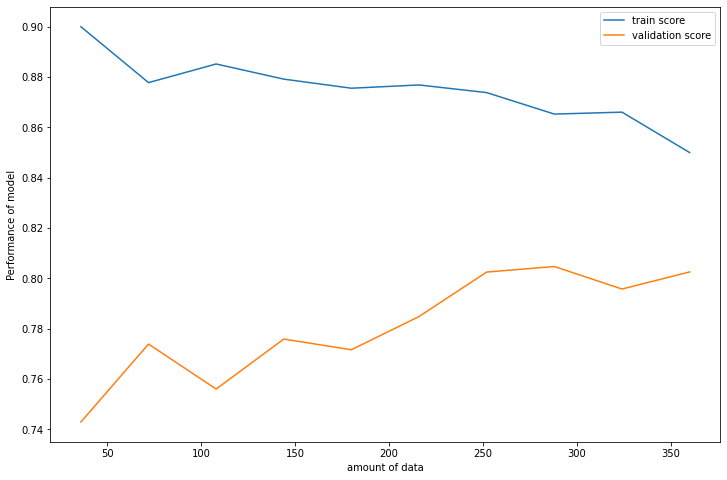

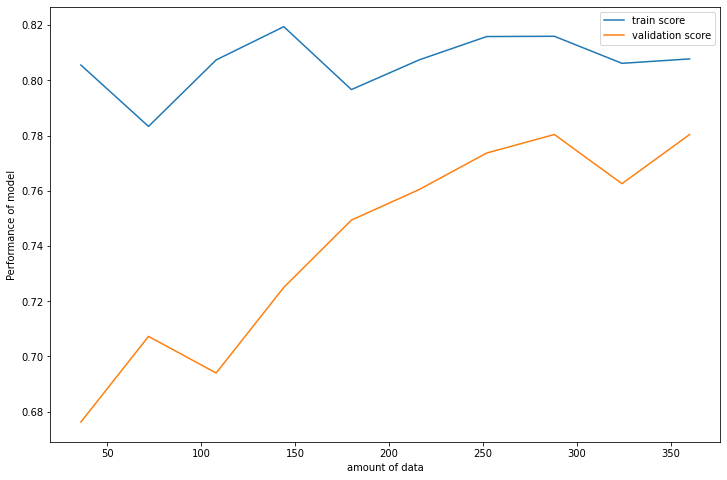

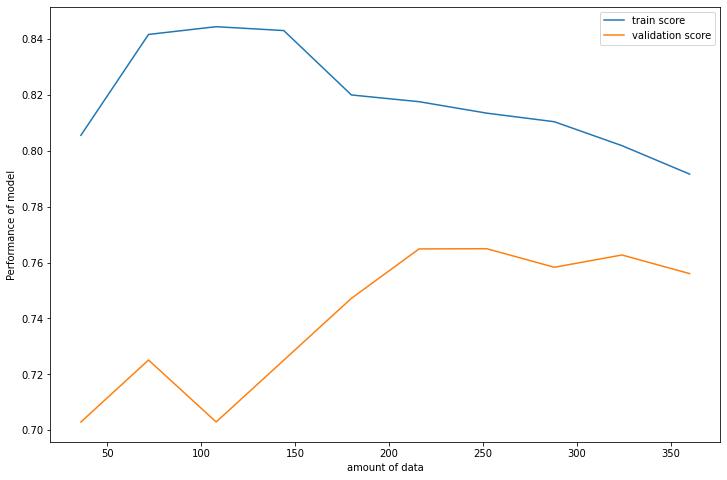

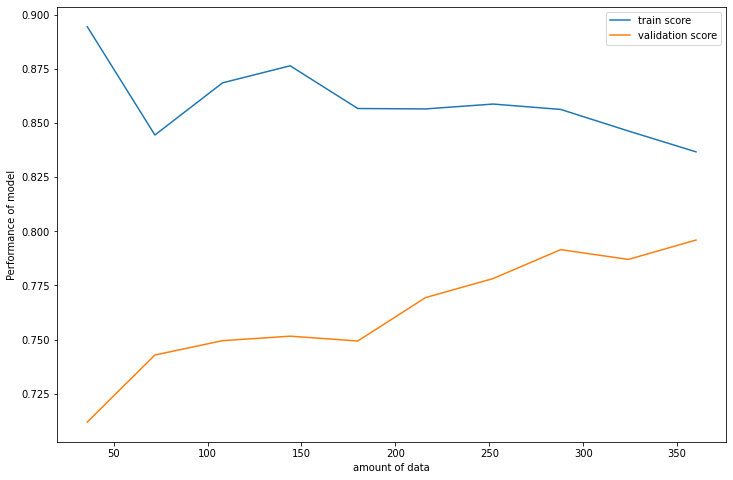

In [16]:
for names,model in dict_of_models.items() :
     print(names)
     evaluation(model)

Optimisation des hyperparametres du modèle SVC et logistic

In [17]:
def optimiseur(model , parameters):
    grid = GridSearchCV(model,parameters)
    grid.fit(X_train_3,y_train_3)

    print("best parameters ",grid.best_params_)
    print("accuracy :",grid.best_score_)



In [18]:
# optimiser SVC
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
model = SVC()
# optimiseur(model , parameters)

In [19]:
#bon parametre SVC
model = SVC(kernel= 'rbf', C = 10)
parameters = {'kernel':'rbf', 'C':10}

In [20]:
# optimiser LogisticRegression
parameters = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
model = LogisticRegression()
#optimiseur(model , parameters)

In [21]:
# bon parametre LogisticRegression
model = LogisticRegression(C= 1.0, penalty="l2")
parameters = {"C":1.0, "penalty":"l2"}


## 2) Feature selection (éliminer les colonnes à faible variance)

<AxesSubplot:>

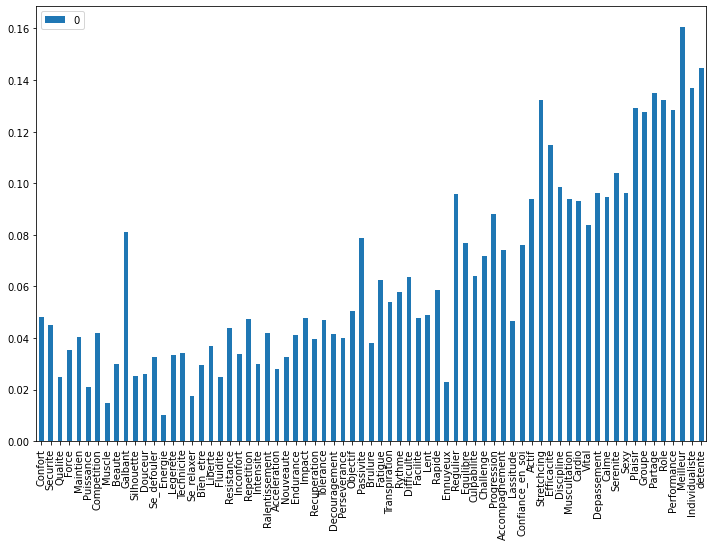

In [22]:
# quel seuil choisir ? 
# Sur X_test
variance = X_test_3.var(axis = 0)
pd.DataFrame(variance,index = X_test_3.columns ).plot.bar(figsize = (12,8))

In [23]:
# Sur X_train
#pd.DataFrame(X_train_3.var(axis = 0),index = X_train_3.columns ).plot.bar(figsize = (12,8))

In [24]:
# Sur X
# pd.DataFrame(X.var(axis = 0),index = X.columns ).plot.bar(figsize = (12,8))

In [25]:
def selection_feature(X_test,X_train,seuil ):
    # élemination des colonnes à variances inferieur au seuil 0.8 ou 0.06 ou 0.04 ou 0.02
    selector = VarianceThreshold(threshold=seuil)
    selector.fit_transform(X_test)
    colonne_garder = np.array(X_test.columns)[selector.get_support()]

    colonne_suprimer = [i for i in col_total if not  i in colonne_garder ]

    
    print('colonne garder size = ',colonne_garder.shape)
    # print('colonne suprimer size = ',len(colonne_suprimer))
    print('colonne_garder = ',colonne_garder)


    # print('colonne_suprime = ',colonne_suprimer)

    # prediction avec uniquement les colonne garder
    X_test_keep = X_test[colonne_garder] 
    X_train_keep = X_train[colonne_garder] 

    return X_train_keep,X_test_keep


In [26]:
#seuil = 0.12
X_train_3,X_test_3 = selection_feature (X_test_3,X_train_3,seuil = 0.06)

colonne garder size =  (30,)
colonne_garder =  ['Galbant' 'Passivite' 'Fatigue' 'Difficulte' 'Regulier' 'Equilibre'
 'Culpabilite' 'Challenge' 'Progression' 'Accompagnement'
 'Confiance_en_soi' 'Actif' 'Stretchcing' 'Efficacite' 'Discipline'
 'Muscultation' 'Cardio' 'Vital' 'Depassement' 'Calme' 'Serenite' 'Sexy'
 'Plaisir' 'Groupe' 'Partage' 'Role' 'Performance' 'Meilleur'
 'Individualiste' 'detente']


In [27]:
dict_of_seuil ={ 'seuil = 0.02' : 0.02,
                'seuil = 0.04' :0.04,
                'seuil = 0.06' :0.06,
                'seuil = 0.08' :0.08,
                'seuil = 0.10' :0.10,
                'seuil = 0.12' :0.12,
                'seuil = 0.14' :0.14
                }

In [28]:
def evaluation_seuil(X_test,y_test_3,X_train,y_train_3,seuil):
    X_train_3,X_test_3 = selection_feature(X_test,X_train,seuil )
    # bon parametre LogisticRegression
    model = SVC(kernel= 'rbf', C = 10)
    fit_model(model,X_train_3,y_train_3)
    y_pred_3_log = prediction(model ,X_test_3)
    print_resulat(y_test_3,y_pred_3_log)
    # matrice_confusion(y_test_3, y_pred_3_log)


def give_precision ( y_test_3 ,y_pred_3_log) :
    precision = precision_score(y_true = y_test_3, y_pred = y_pred_3_log, average ='macro')
    return precision

def give_recall( y_test_3 ,y_pred_3_log) :
    recall = recall_score(y_true = y_test_3, y_pred = y_pred_3_log, average ='macro')
    return recall  

def give_f1score( y_test_3 ,y_pred_3_log) :
    f1score= f1_score(y_true = y_test_3, y_pred = y_pred_3_log , average ='macro')
    return f1score      



def give_list_precision(X_test,y_test_3,X_train,y_train_3,seuil,list_precision):
    X_train_3,X_test_3 = selection_feature(X_test,X_train,seuil )
    # bon parametre LogisticRegression
    model = SVC(kernel= 'rbf', C = 10)
    fit_model(model,X_train_3,y_train_3)
    y_pred_3_log = prediction(model ,X_test_3)

    precision = give_precision ( y_test_3 ,y_pred_3_log) 
    list_precision.append(precision) 

    return list_precision

def give_list_recall(X_test,y_test_3,X_train,y_train_3,seuil,list_recall):
    X_train_3,X_test_3 = selection_feature(X_test,X_train,seuil )
    # bon parametre LogisticRegression
    model = SVC(kernel= 'rbf', C = 10)
    fit_model(model,X_train_3,y_train_3)
    y_pred_3_log = prediction(model ,X_test_3)

    recall = give_recall( y_test_3 ,y_pred_3_log) 
    list_recall.append(recall)

    return list_recall


def give_list_f1score(X_test,y_test_3,X_train,y_train_3,seuil,list_f1score):
    X_train_3,X_test_3 = selection_feature(X_test,X_train,seuil )
    model = SVC(kernel= 'rbf', C = 10)
    fit_model(model,X_train_3,y_train_3)
    y_pred_3_log = prediction(model ,X_test_3)

    f1score = give_f1score( y_test_3 ,y_pred_3_log) 
    list_f1score.append(f1score)

    return list_f1score



In [29]:
list_precision = []
list_recall = []
list_f1score = []
list_seuil = np.linspace(0.02,0.14,50)
for seuil  in list_seuil :
    list_precision = give_list_precision(X_test_3,y_test_3,X_train_3,y_train_3,seuil,list_precision )
    list_recall = give_list_recall(X_test_3,y_test_3,X_train_3,y_train_3,seuil,list_recall )
    list_f1score = give_list_f1score(X_test_3,y_test_3,X_train_3,y_train_3,seuil,list_f1score)




plt.figure(figsize =(12,8))
plt.plot(list_seuil,list_precision,label = 'precission')
plt.plot(list_seuil,list_recall,label = 'recall')
plt.plot(list_seuil,list_f1score ,label = 'f1score')
plt.legend()
plt.title('Performance de SVC en fonction du seuil')
plt.xlabel('seuil')
plt.ylabel('Performance ')
plt.show()




colonne garder size =  (30,)
colonne_garder =  ['Galbant' 'Passivite' 'Fatigue' 'Difficulte' 'Regulier' 'Equilibre'
 'Culpabilite' 'Challenge' 'Progression' 'Accompagnement'
 'Confiance_en_soi' 'Actif' 'Stretchcing' 'Efficacite' 'Discipline'
 'Muscultation' 'Cardio' 'Vital' 'Depassement' 'Calme' 'Serenite' 'Sexy'
 'Plaisir' 'Groupe' 'Partage' 'Role' 'Performance' 'Meilleur'
 'Individualiste' 'detente']


NameError: name 'fit_model' is not defined

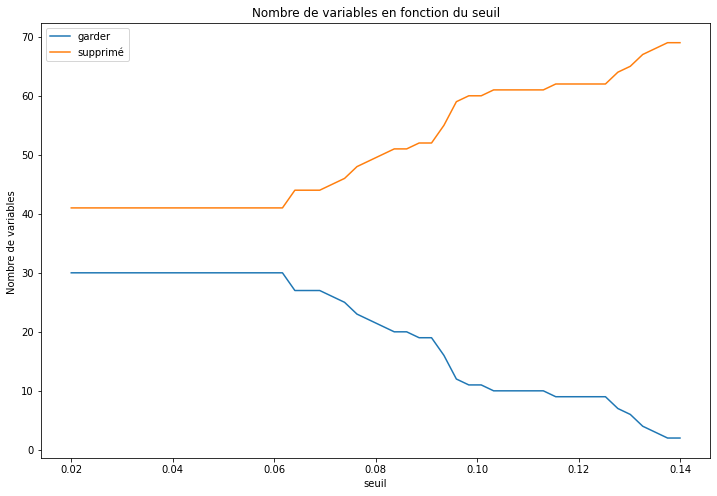

In [30]:
def col_selection(X_test,seuil):
    # élemination des colonnes à variances inferieur au seuil 0.8 ou 0.06 ou 0.04 ou 0.02
    selector = VarianceThreshold(threshold=seuil)
    selector.fit_transform(X_test)

    colonne_garder = np.array(X_test.columns)[selector.get_support()]
    colonne_suprimer = [i for i in col_total if not  i in colonne_garder ]

    N_keep = len(colonne_garder)
    N_suprim = len(colonne_suprimer)

    return N_suprim , N_keep

list_seuil = np.linspace(0.02,0.14,50)
list_col_sup = []
list_col_keep = []
for seuil in list_seuil :
    N_suprim , N_keep = col_selection(X_test_3,seuil)
    list_col_sup.append(N_suprim)
    list_col_keep.append(N_keep)

plt.figure(figsize =(12,8))
plt.plot(list_seuil,list_col_keep,label = 'garder')
plt.plot(list_seuil,list_col_sup ,label = 'supprimé')
plt.legend()
plt.title('Nombre de variables en fonction du seuil')
plt.xlabel('seuil')
plt.ylabel('Nombre de variables ')
plt.show()


ValueError: x and y must have same first dimension, but have shapes (50,) and (0,)

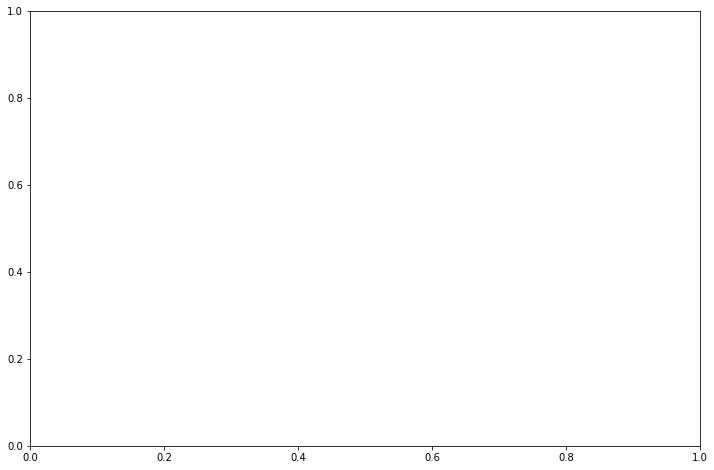

In [31]:
plt.figure(figsize =(12,8))
plt.plot(list_col_keep,list_precision,label = 'garder')
plt.plot(list_col_sup,list_precision ,label = 'supprimé')
plt.legend()
plt.title('Precicion en fonction du Nombre de colonnes ')
plt.ylabel('Precision')
plt.xlabel('Nombre de colonnes  ')
plt.show()

In [ ]:

# for names,seuil in dict_of_seuil.items() :
#     print(names)
   
#     evaluation_seuil(X_test_3,y_test_3,X_train_3,y_train_3,seuil)

## 3) Tester avec le modèle final

In [32]:
def fit_model (model,X_train_3,y_train_3):
    model.fit(X_train_3,y_train_3)

def prediction ( model ,X_test_3):
    # prediction
    y_pred_3_log = model.predict(X_test_3)
    return y_pred_3_log
    
def print_resulat(y_test_3,y_pred_3_log):
    print( 'recall_score = ' ,recall_score(y_true = y_test_3, y_pred = y_pred_3_log, average ='macro'))
    print( 'f1-score = ' ,f1_score(y_true = y_test_3, y_pred = y_pred_3_log , average ='macro'))
    print( 'precision_score = ' ,precision_score(y_true = y_test_3, y_pred = y_pred_3_log, average ='macro'))
    

def matrice_confusion(y_test_3, y_pred_3_log):
    # Matrice de confusion
    confusion_3 = metrics.confusion_matrix(y_true = y_test_3,y_pred = y_pred_3_log)
    
    confusion = pd.DataFrame(confusion_3, index =['y_true: 0','y_true: 1','y_true: 2'] ,columns=['y_pred : 0','y_pred : 1','y_pred : 2'] )
    print('confusion  log_3 \n' ,confusion_3)
    print('tab log_3 \n' ,confusion)

    plt.matshow(confusion_3, cmap=plt.cm.gray)
    plt.xlabel('y_true')
    plt.ylabel('y_pred')
    plt.show()


In [47]:
# bon parametre LogisticRegression
model = LogisticRegression(C= 1.0, penalty="l2")
model = SVC(kernel= 'rbf', C = 10,probability=True)
parameters = {"C":1.0, "penalty":"l2"}

In [48]:
fit_model(model,X_train_3,y_train_3)
y_pred_3_log = prediction(model ,X_test_3)

In [49]:
print_resulat(y_test_3,y_pred_3_log)

recall_score =  0.814202172096909
f1-score =  0.8305431941795578
precision_score =  0.854129330943847


In [52]:
model.predict_proba(X_test_3)

array([[8.78908939e-01, 1.20436908e-01, 6.54153693e-04],
       [3.43123423e-03, 1.45240218e-03, 9.95116364e-01],
       [9.33883222e-01, 6.60127841e-02, 1.03994156e-04],
       [9.86121660e-02, 7.16990033e-01, 1.84397801e-01],
       [2.03883594e-01, 6.26948253e-01, 1.69168153e-01],
       [7.91608096e-02, 6.11826651e-01, 3.09012539e-01],
       [5.87218564e-01, 4.11571404e-01, 1.21003177e-03],
       [8.83763261e-01, 1.16077654e-01, 1.59084391e-04],
       [5.35619097e-02, 6.13382190e-01, 3.33055900e-01],
       [4.48499471e-03, 5.85028645e-03, 9.89664719e-01],
       [8.11046441e-01, 1.88718666e-01, 2.34893736e-04],
       [9.17092623e-01, 8.28281232e-02, 7.92534806e-05],
       [6.48002862e-02, 8.55414381e-01, 7.97853327e-02],
       [8.37871464e-01, 1.62009206e-01, 1.19329721e-04],
       [8.60204090e-01, 1.38981021e-01, 8.14889049e-04],
       [2.04802736e-01, 7.92126625e-01, 3.07063926e-03],
       [8.91230314e-03, 5.54464845e-02, 9.35641212e-01],
       [5.44799920e-01, 4.54498

confusion  log_3 
 [[58  4  0]
 [10 18  3]
 [ 0  1 19]]
tab log_3 
            y_pred : 0  y_pred : 1  y_pred : 2
y_true: 0          58           4           0
y_true: 1          10          18           3
y_true: 2           0           1          19


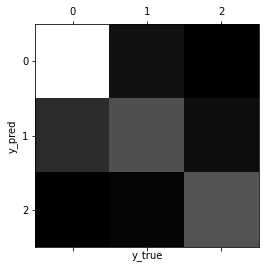

In [240]:
matrice_confusion(y_test_3, y_pred_3_log)

In [154]:
# __init__.py pour creer les package 

# pour test :pip3 install pytest
# import pytest